12.1 모델

k-NN(k-Nearest Neighbors, k-근접이웃)은 가장 단순한 예측 모델 중 하나.

수학적인 가정 1도 없고 엄청난 컴퓨터가 필요로 하는것도 아님.

필요한 것은 단지,
    1. 거리를 재는 방법
    2. 서로 가까운 점들은 유사하다는 가정
   
여러 다른 기술은 데이터에 내재된 패턴을 찾기 위해 데이터셋 전체를 봐야 하지만, k-NN은 궁금한 점 주변에 있는 것만 보면 되기 때문에 그렇게 많은 데이터를 뒤지지 않아도 됨.

하지만 kNN은 특정 현상의 원인을 파악하는데는 큰 도움 x.

즉, 주어진 모델들은 나의 투표 결과가 소득 수준이나 혼인 상태에 따라 판가름된다고 얘기해 주지만, kNN은 왜 그렇게 투표를 했는지 설명해 주지 x.

보통은 데이터 포인트 몇 개와 그에 대한 레이블(label) 정보가 주어짐. 레이블은 '스팸인가?', '독성이 있는가?', '재밌는가'와 같이 특정 조건을 만족했는지에 따라 참 또는 거짓이 되거나, 영화등급과 같이 전체 관람가, 12세 관람가, 15세 관람가 등 다양한 카테고리가 될 수 있다. 또는 대선 후보의 이름이거나 가장 좋아하는 프로그래밍 언어일 수도 있다.

이 경우, 데이터 포인트는 벡터다. 따라서 distance 함수를 사용할 수 있다.

먼저 k를 3 또는 5로 정했다고 가정. 새로운 데이터 포인트를 분류학 싶다면 먼저 k개의 가장 가까운 포인트를 찾고, 찾아낸 포인트들의 레이블을 보다 다수결(majority vote)로 새로운 데이터 포인트의 레이블을 정할 수 있다. 이렇게 하기 위해 먼저 다수결을 정하는 함수는 다음과 같다.

In [1]:
### load distance from linear_algebra
from collections import Counter

def vector_subtract(v,w):
    return [v_i-w_i for v_i, w_i in zip(v,w)]

def sum_of_squares(v):
    # v_1 * v_1 + ... + v_n*v_n
    return dot(v,v)

def sqared_distance(v,w):
    # (v_1 - w_1)**2 + ... + (v_n - w_n)**2
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return math.sqrt(sqared_distance(v,w))

In [2]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

하지만 이렇게 하면 동점인 항목들이 똑똑하게 처리되지 않는다. e.g. 우리가 영화에 등급을 매기고 있으며, 가장 인접한 다섯 개의 영화가 각각 전체 관람가, 전체 관람가, 13세 관람가, 13세 관람가, 19세 관람가로 구분된다고 해보자. 전체 2개, 13세 2개이기 때문에 공동 1등이 되는데, 이 경우 다음과 같이 조치 가능.
    * 여러 1등 중 임의로 하나를 정한다.
    * 거리를 가중치로 사용해서 거리 기반 투표를 한다.
    * 단독 1등이 생길 때까지 k를 하나씩 줄인다.
세번째 경우는 다음과 같이 구현 가능.

In [3]:
def majority_vote(labels):
    # labels는 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬되어 있다고 가정
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    if num_winners == 1:
        return winner                     # 1등이 하나이기 때문에 반환
    else:
        return majority_vote(labels[:-1]) # 가장 먼 데이터를 제외하고 다시 찾아봄

이 방법을 쓰면 어떻게든 결과값은 계산됨. 가장 극단적인 경우에는 k가 1이 되어 가장 가까운 레이블 하나만 보고 새로운 레이발을 정하면 된다.

이제 이 함수를 사용하면 분류기도 간단히 만들 수 있다.

In [55]:
def knn_classify(k, labeled_points, new_point):
    # 각 labeled_points는 (데이터 포인트, 레이블) 쌍으로 구성되어 있음
    
    # labeled_points를 가장 가까운 데이터부터 가장 먼 데이터 순서로 정렬
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))
    
    # 가장 가까운 k 데이터 포인트의 레이블을 살펴보고
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # 투표를 함
    return majority_vote(k_nearest_labels)

12.2 예시 : 가장 인기 있는 프로그래밍 언어

In [47]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [46]:
def plot_state_borders(plt, color='0.8'):
    pass

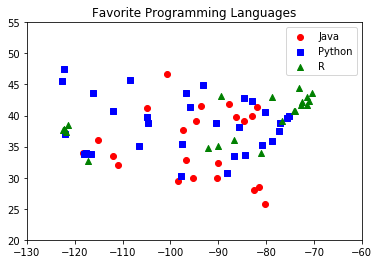

In [58]:
# 프로그래밍 언어가 키, (경도, 위도) 쌍이 값
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# 각 프로그래밍 언어마다 색깔과 마커가 다름
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# 각 프로그래밍 언어마다 데이터 포인트를 뿌림
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                label=language, zorder=10)

plot_state_borders(plt)    # 주 경계선을 그려 주는 함수ㄱㅏ 있다고 가정

plt.legend(loc=0)          # matplolib 가 알아서 위치 선정
plt.axis([-130,-60,20,55]) # 축 설정
plt.title("Favorite Programming Languages")
plt.show()

인접한 지역끼리 비슷한 언어를 좋아하는 경향을 보임.

도시의 이웃 도시들을 통해 해당 도시의 선호 언어를 추정하는 방법이 얼마나 좋은지 확인.

In [59]:
for k in [1,3,5,7]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                        for other_city in cities
                        if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)
        
        if predicted_language == actual_language:
            num_correct += 1
            
    print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))
    
# 3개의 근접이웃을 봤을 때(즉 k=3일 때) 성능이 59%로 가장 좋다.

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


이제 k값에 따라 전반적으로 어떤 지역이 어떤 언어로 분류될 지 살펴볼 수 있다.

앞서 도시를 시각화한것과 비슷하게 다양한 위경도별 예측값 확인

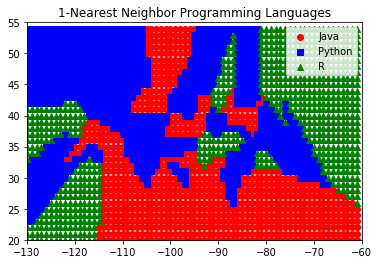

In [66]:
# k = 1 일떄

plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 1 # 3 혹은 5 등등..

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)


for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

plot_state_borders(plt, color='black')   

plt.legend(loc=0)         
plt.axis([-130,-60,20,55])
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

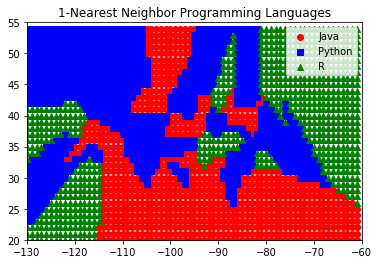

In [67]:
# k = 3 일떄

plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 1 # 3 혹은 5 등등..

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)


for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

plot_state_borders(plt, color='black')   

plt.legend(loc=0)         
plt.axis([-130,-60,20,55])
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

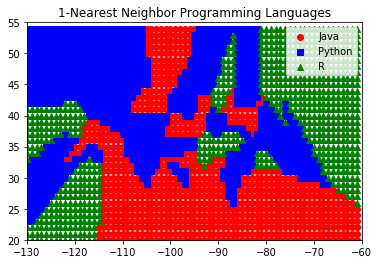

In [68]:
# k = 5 일떄

plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 1 # 3 혹은 5 등등..

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)


for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

plot_state_borders(plt, color='black')   

plt.legend(loc=0)         
plt.axis([-130,-60,20,55])
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

12.3 차원의 저주

k-NN은 '차원의 저주 (curse of dimensionality)'라는 것 때문에 고차원에서 문제가 생김.

이것은 데이터가 고차원이라는 것은 다루는 공간이 엄청나게 크다는 것을 의미하며, 그 떄문에 데이터 포인트들은 서로 '근접'하지 않게 된다. 이 현상을 관찰하기 위해서는 d-차원 단위 범위 내에 다양한 차원으로 임의의 점 두개를 생성해 보면 된다.

In [33]:
import math

In [25]:
def distance(a, b):
    return math.sqrt(sum((ai-bi)**2 for ai,bi in zip(a,b)))

In [26]:
def mean(xs):
    return sum(xs)/len(xs)

In [22]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

In [23]:
def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

1차부터 100차원까지의 각각의 차원에 대해 총 10000개의 거리를 계산 뒤,

각 점들 간의 평균 거리와 최소 거리를 구해 보자.

In [35]:
dimensions = range(1,101)

avg_distances = []
min_distances = []
random.seed(0)

for dim in dimensions:
    distances = random_distances(dim, 10000) # 10000개 임의 생성
    avg_distances.append(mean(distances)) # 평균 거리
    min_distances.append(min(distances))

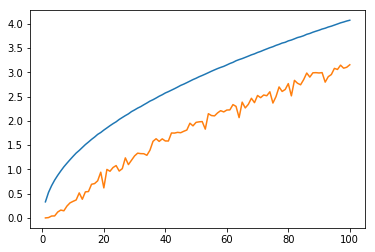

In [37]:
plt.plot(dimensions, avg_distances)
plt.plot(dimensions, min_distances)
plt.show()

차원이 증가할수록 점들 간 평균거리도 증가하지만, 더 큰 문제는 최근접거리와 평균 거리의 비율

In [38]:
min_avg_ratio = [min_dist / avg_dist
                 for min_dist, avg_dist in zip(min_distances, avg_distances)]

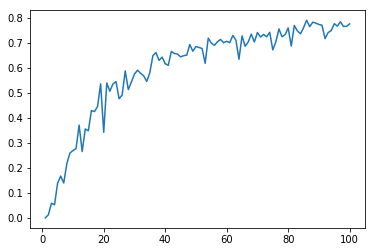

In [40]:
plt.plot(dimensions, min_avg_ratio)
plt.show()

저 차원에서는 근접이웃들이 평균 거리에 비해 월등히 가까움.

하지만 두 점이 '가깝다'고 하려면 모든 차원에 대해 가까워야 하기 때문에, 차원이 추가된다는 것은 (단지 노이즈라 해도) 두 점이 가까울 수 있는 가능성이 현저히 줄어든다는 것을 의미하기도 한다.

즉, 고차원일 때는 근접이웃들이 평군 거리와 큰 차이가 나지 않게 되고, 그렇기 때문에 가깝다는 것이 별 의미를 가지지 않게 된다(데이터에 뚜렷한 구조가 있어서 고차원임에도 저차원의 특성을 가지지 않는 한).

고차원 문제를 바라볼 수 있는 또 다른 관점은 공간의 성김(sparsity)이다.

0과 1사이에서 50개의 점을 임의로 고르면, 단위 구간을 제법 채울 수 있다.

2차원상에서 똑같이 50개를 고르면, 단위 공간을 덜 채우게 되고, 3차원에서는 그보다 더 적은 공간을 채우게 된다.

matplolib로는 4차원을 그릴 수 없기 떄문에 이쯤에서 그치겠다. 여기까지만 해봐도 차원이 높아질수록 점들 사이의 거리가 멀어지고 빈 공간이 많아진다는 것을 충분히 느낄 수 있었을 것이다.

데이터가 기하급수적으로 많지 않으면, 고차원에서는 모든 점 사이의 거리가 멀어진다.

따라서 고차원에서 k-NN을 이용하려면, 먼저 차원 축소를 하는 것이 좋을 것이다.

Reference:
    * 밑바닥부터 시작하는 데이터과학 10장,
    * https://github.com/newhiwoong/DATA_SCIENCE_FROM_SCRATCH
    * https://github.com/joelgrus/data-science-from-scratch
    * https://github.com/cbare/data-science-from-scratch
    